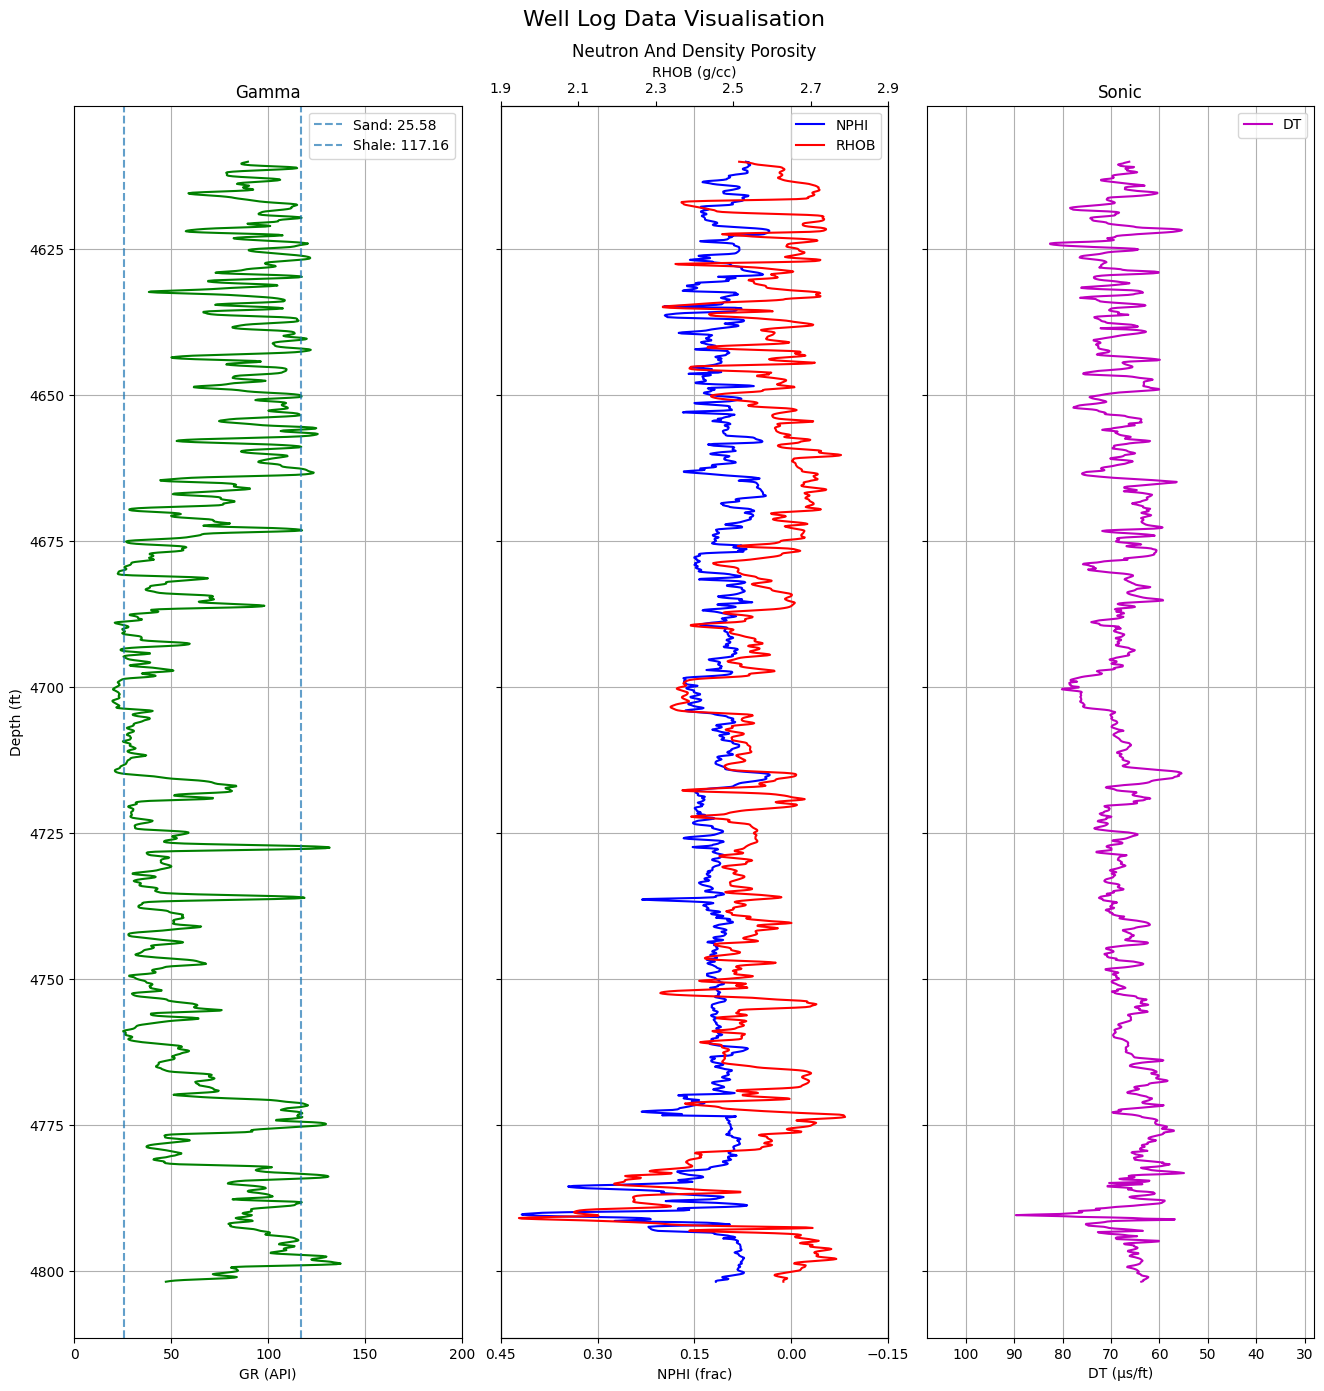

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("D:\Harsh Personal\Resume\Core Projects\Well Logging\WellData.csv", header=0)
df = df.rename(columns=str.strip)  # Clean column names

# Calculate sand and shale baseline values using percentiles
GR_sand = round(np.percentile(df['GR'], 5),2)   # 5th percentile = clean sand baseline
GR_shale = round(np.percentile(df['GR'], 95),2)  # 95th percentile = pure shale baseline

# Create figure with subplots sharing Y-axis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 16), sharey=True)
plt.subplots_adjust(wspace=0.1)

# Track 1: Gamma Ray
ax1.plot(df['GR'], df['DEPTH'], 'g-')
ax1.axvline(GR_sand, linestyle='--', alpha=0.7, label=f'Sand: {GR_sand:.2f}')
ax1.axvline(GR_shale, linestyle='--', alpha=0.7, label=f'Shale: {GR_shale:.2f}')
ax1.set_xlabel('GR (API)')
ax1.set_xlim(0, 200)
ax1.set_xticks([0, 50, 100, 150, 200])
ax1.set_ylabel('Depth (ft)')
ax1.set_title('Gamma')
ax1.grid(True)
ax1.invert_yaxis()
ax1.legend()

# Track 2: Neutron Porosity + Density (RHOB)
# Plot NPHI
nphi_line, = ax2.plot(df['NPHI'], df['DEPTH'], 'b-', label='NPHI')
ax2.set_xlabel('NPHI (frac)')
ax2.set_xlim(0.45, -0.15)
ax2.set_xticks([0.45, 0.3, 0.15,0, -0.15])

# Twin axis for density
ax2b = ax2.twiny()
rhob_line, = ax2b.plot(df['RHOB'], df['DEPTH'], 'r-', label='RHOB')
ax2b.set_xlabel('RHOB (g/cc)')
ax2b.set_xlim(1.9, 2.9)
ax2b.set_xticks([1.9,2.1,2.3,2.5,2.7,2.9])
ax2.set_title('Neutron And Density Porosity')
ax2.grid(True)
ax2.invert_yaxis()

# Combine legends from both axes
ax2.legend(handles=[nphi_line, rhob_line], loc='upper right')

# Track 3: Sonic Log (DT)
dt_line, = ax3.plot(df['DT'], df['DEPTH'], 'm-', label='DT')
ax3.set_xlabel('DT (μs/ft)')
ax3.set_xlim(108, 28)
ax3.set_title('Sonic')
ax3.grid(True)
ax3.invert_yaxis()
ax3.legend()

plt.suptitle('Well Log Data Visualisation', fontsize=16, y=0.94)
plt.show()

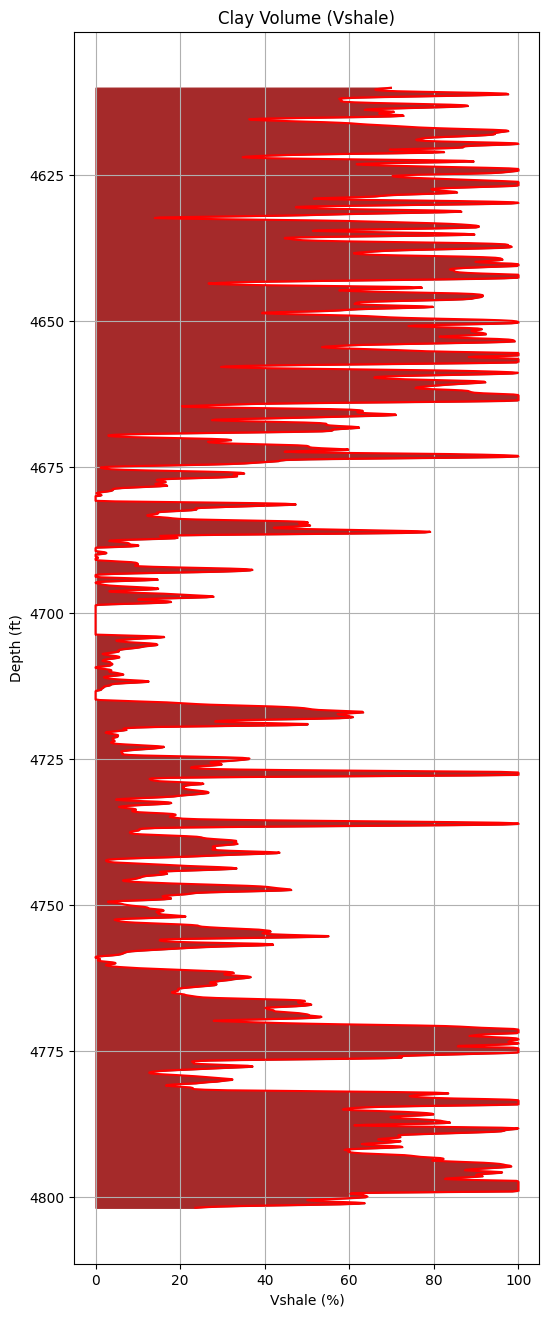

In [8]:
# Calculate Vshale
df['Vsh'] = ((df['GR'] - GR_sand) / (GR_shale - GR_sand))
df['Vsh'] = df['Vsh'].clip(0, 1)  # Constrain between 0–1
# Vshale plot
plt.figure(figsize=(6, 16))
plt.fill_betweenx(df['DEPTH'], 0, df['Vsh']*100, color="brown")
plt.plot(df['Vsh']*100, df['DEPTH'], 'r-', linewidth=1.5)
plt.xlabel('Vshale (%)')
plt.ylabel('Depth (ft)')
plt.title('Clay Volume (Vshale)')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


In [9]:

# Ask user for depth and compute Vshale there
depth_input = float(input("Enter target depth (ft): "))
# find nearest depth in your DataFrame
idx = (df['DEPTH'] - depth_input).abs().idxmin()
vsh_at_depth = df.at[idx, 'Vsh'] * 100

print(f"\nAt depth {df.at[idx, 'DEPTH']:.2f} ft → GR value = {df.at[idx,'GR']:.2f} API and Vshale = {vsh_at_depth:.2f}%")
print(f"GR_sand (5th pct) = {GR_sand:.2f} API, GR_shale (95th pct) = {GR_shale:.2f} API")

Enter target depth (ft): 4650

At depth 4650.00 ft → GR value = 115.80 API and Vshale = 98.52%
GR_sand (5th pct) = 25.58 API, GR_shale (95th pct) = 117.16 API
